In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore




In [5]:
df = pd.read_csv(r'C:\Users\dell-67a\solar-challenge-week1\data\togo-dapaong_qc.csv')
df.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-25 00:01,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4,NaN
1,2021-10-25 00:02,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4,NaN
2,2021-10-25 00:03,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4,NaN
3,2021-10-25 00:04,-1.2,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,0.3,229.1,4.6,977,0,0.0,24.7,24.4,NaN
4,2021-10-25 00:05,-1.2,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,0.4,227.5,1.6,977,0,0.0,24.7,24.4,NaN


In [6]:
df.describe()



,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,230.555040,151.258469,116.444352,226.144375,219.568588,27.751788,55.013160,2.368093,3.229490,0.557740,161.741845,10.559568,975.915242,0.000535,0.001382,32.444403,33.543330,NaN
std,322.532347,250.956962,156.520714,317.346938,307.932510,4.758023,28.778732,1.462668,1.882565,0.268923,91.877217,5.915490,2.153977,0.023116,0.026350,10.998334,12.769277,NaN
min,-12.700000,0.000000,0.000000,0.000000,0.000000,14.900000,3.300000,0.000000,0.000000,0.000000,0.000000,0.000000,968.000000,0.000000,0.000000,13.100000,13.100000,NaN
25%,-2.200000,0.000000,0.000000,0.000000,0.000000,24.200000,26.500000,1.400000,1.900000,0.400000,74.800000,6.900000,975.000000,0.000000,0.000000,23.900000,23.600000,NaN
50%,2.100000,0.000000,2.500000,4.400000,4.300000,27.200000,59.300000,2.200000,2.900000,0.500000,199.100000,10.800000,976.000000,0.000000,0.000000,28.400000,28.400000,NaN
75%,442.400000,246.400000,215.700000,422.525000,411.000000,31.100000,80.800000,3.200000,4.400000,0.700000,233.500000,14.100000,977.000000,0.000000,0.000000,40.600000,43.000000,NaN
max,1424.000000,1004.500000,805.700000,1380.000000,1367.000000,41.400000,99.800000,16.100000,23.100000,4.700000,360.000000,86.900000,983.000000,1.000000,2.300000,70.400000,94.600000,NaN


In [7]:
df.isna().sum()

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

In [8]:

missing = df.isna().mean() * 100
missing[missing > 5]

Comments    100.0
dtype: float64

In [9]:
columns_to_check = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
z_scores = df[columns_to_check].apply(zscore)

# Flag outliers
outliers = (z_scores.abs() > 3)
print(outliers.sum())

# Handle missing values
df[columns_to_check] = df[columns_to_check].fillna(df[columns_to_check].median())


GHI        305
DNI       1062
DHI       3415
ModA       137
ModB       206
WS        3510
WSgust    3915
dtype: int64


In [10]:
df.to_csv(r'C:\Users\dell-67a\solar-challenge-week1\data\togo-dapaong_qc_cleaned.csv', index=False)


Text(0.5, 1.0, 'Time Series: GHI, DNI, DHI, Tamb')

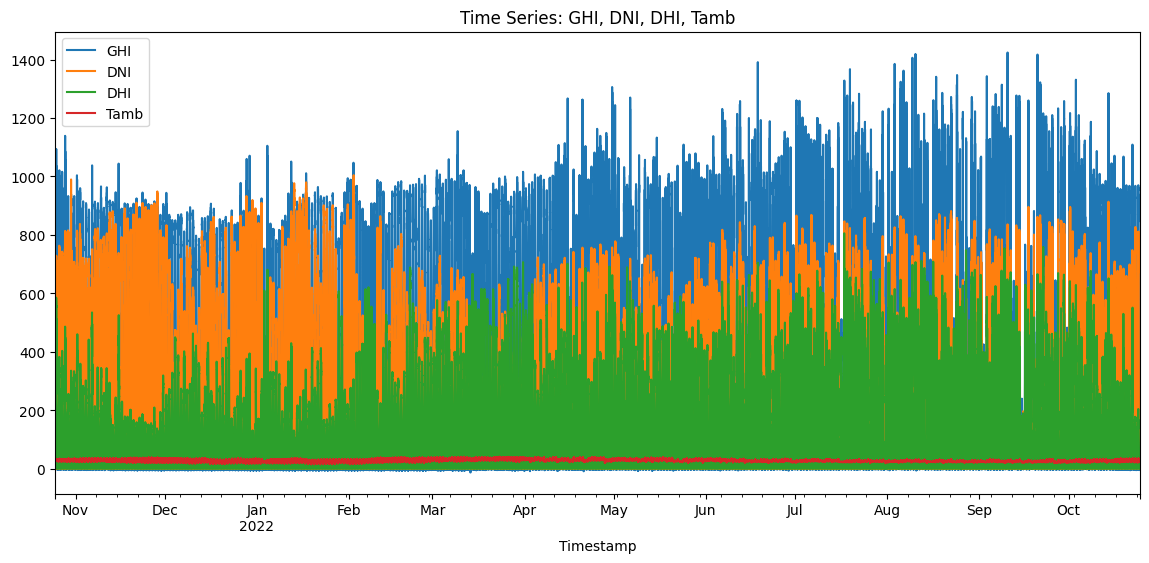

In [11]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.set_index('Timestamp', inplace=True)

df[['GHI', 'DNI', 'DHI', 'Tamb']].plot(figsize=(14,6))
plt.title("Time Series: GHI, DNI, DHI, Tamb")
# plt.show()


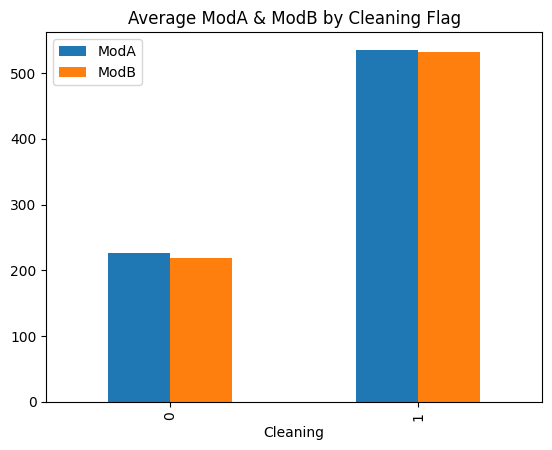

In [12]:
df.groupby('Cleaning')[['ModA', 'ModB']].mean().plot(kind='bar')
plt.title("Average ModA & ModB by Cleaning Flag")
plt.show()


<Axes: >

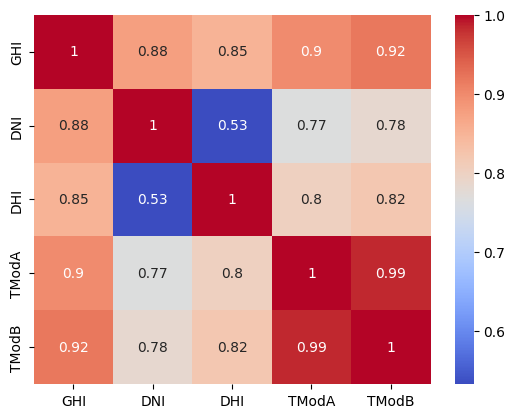

In [13]:
sns.heatmap(df[['GHI', 'DNI', 'DHI', 'TModA', 'TModB']].corr(), annot=True, cmap='coolwarm')


<Axes: xlabel='WS', ylabel='GHI'>

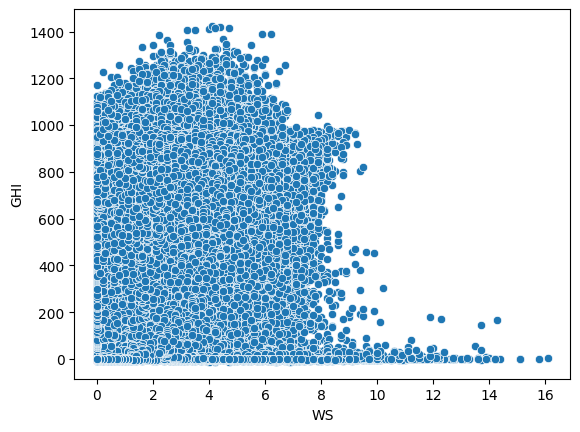

In [14]:
sns.scatterplot(x='WS', y='GHI', data=df)


<Axes: xlabel='RH', ylabel='Tamb'>

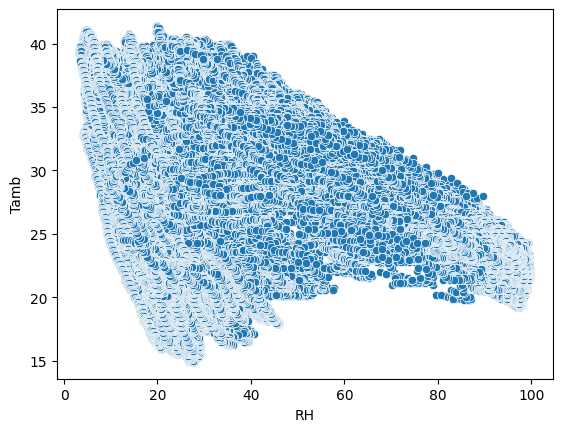

In [15]:
sns.scatterplot(x='RH', y='Tamb', data=df)

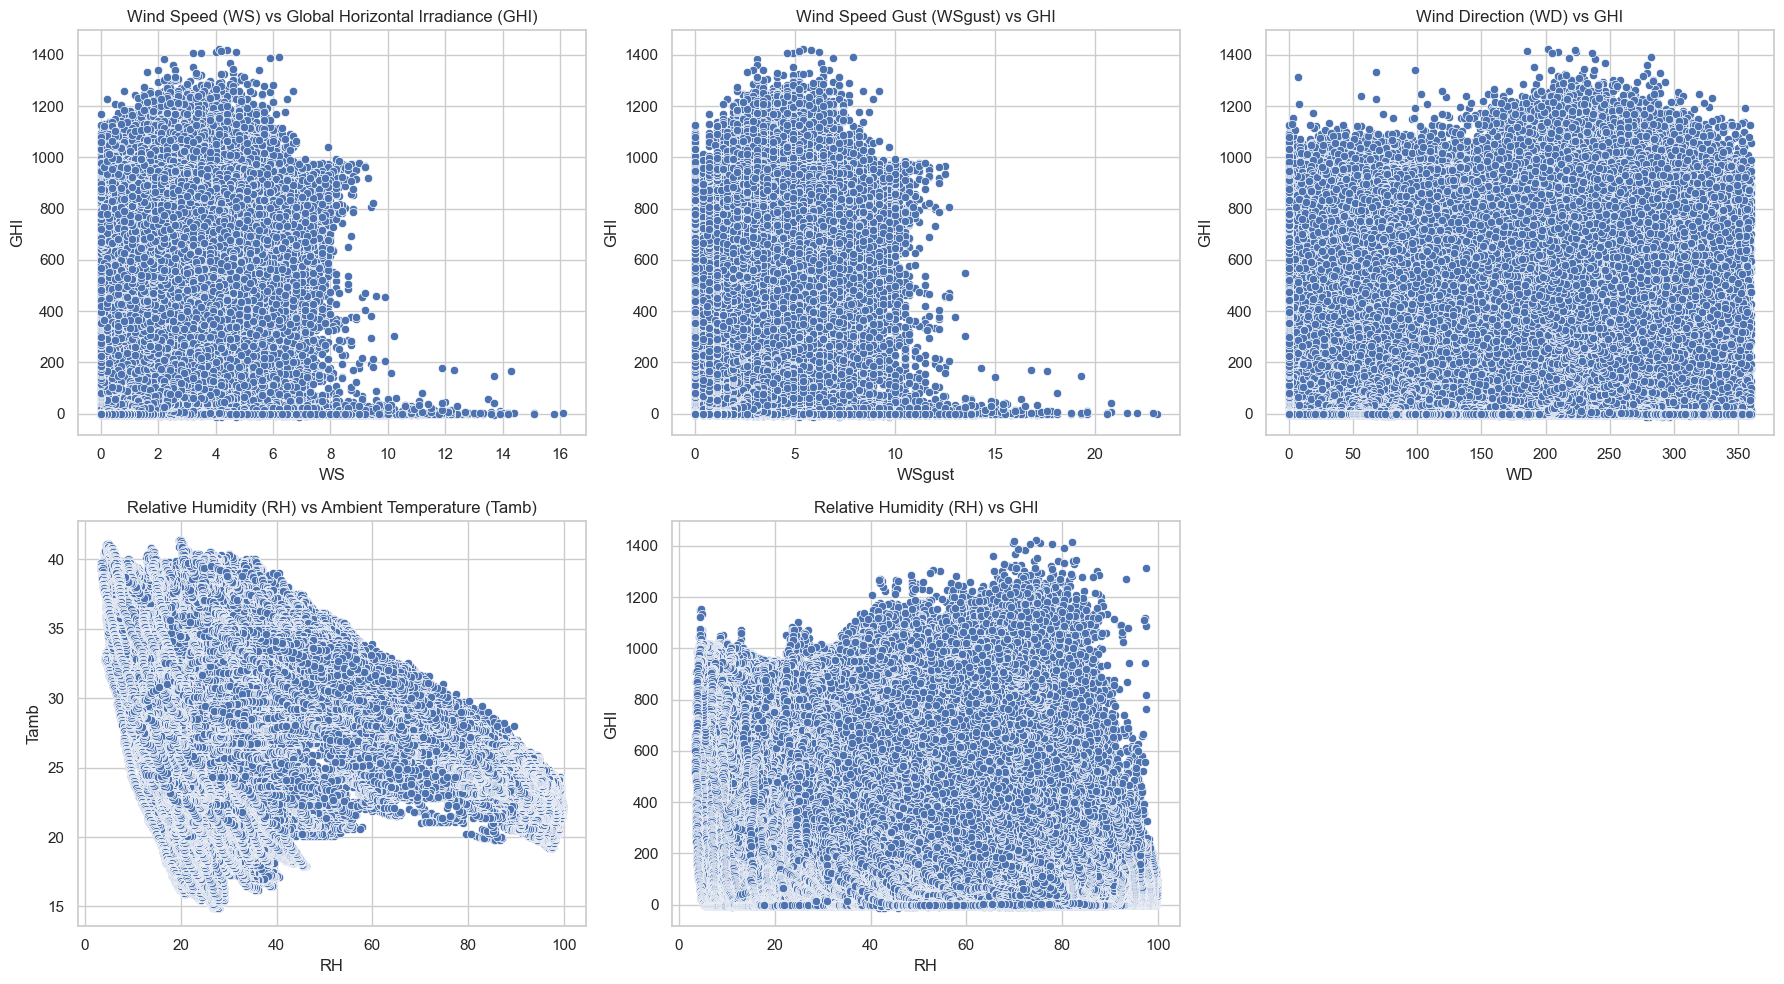

In [16]:
# Set style
sns.set(style="whitegrid")

# Create scatter plots
fig, axs = plt.subplots(2, 3, figsize=(18, 10))

# WS vs GHI
sns.scatterplot(x='WS', y='GHI', data=df, ax=axs[0, 0])
axs[0, 0].set_title('Wind Speed (WS) vs Global Horizontal Irradiance (GHI)')

# WSgust vs GHI
sns.scatterplot(x='WSgust', y='GHI', data=df, ax=axs[0, 1])
axs[0, 1].set_title('Wind Speed Gust (WSgust) vs GHI')

# WD vs GHI
sns.scatterplot(x='WD', y='GHI', data=df, ax=axs[0, 2])
axs[0, 2].set_title('Wind Direction (WD) vs GHI')

# RH vs Tamb
sns.scatterplot(x='RH', y='Tamb', data=df, ax=axs[1, 0])
axs[1, 0].set_title('Relative Humidity (RH) vs Ambient Temperature (Tamb)')

# RH vs GHI
sns.scatterplot(x='RH', y='GHI', data=df, ax=axs[1, 1])
axs[1, 1].set_title('Relative Humidity (RH) vs GHI')

# Hide last subplot (empty)
axs[1, 2].axis('off')

plt.tight_layout()
plt.show()


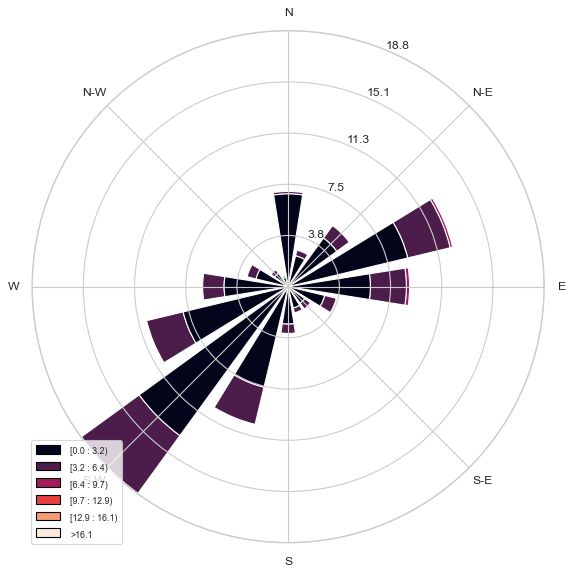

In [17]:
!pip install windrose
from windrose import WindroseAxes

ax = WindroseAxes.from_ax()
ax.bar(df['WD'], df['WS'], normed=True, opening=0.8, edgecolor='white')
ax.set_legend()


Text(0, 0.5, 'Frequency')

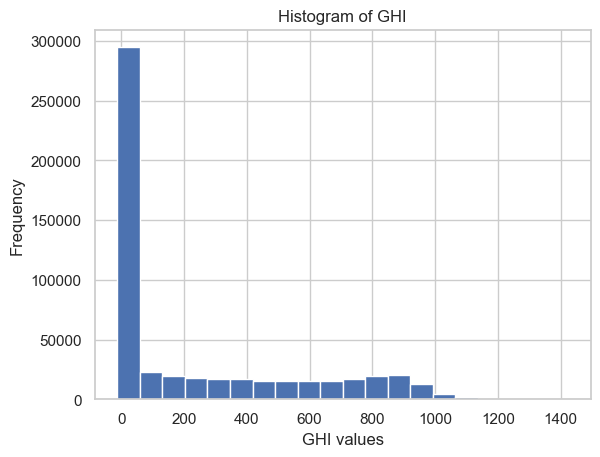

In [18]:
df['GHI'].hist(bins=20)
plt.title('Histogram of GHI') # Add a title
plt.xlabel('GHI values') # Add x-axis label
plt.ylabel('Frequency') # Add y-axis label


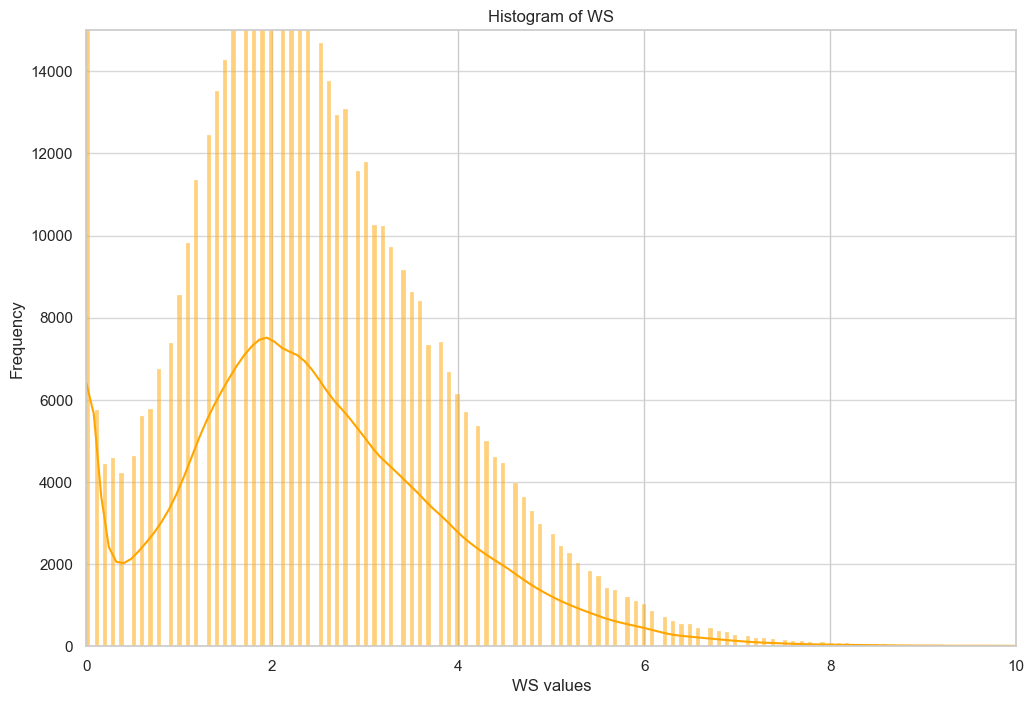

In [19]:
plt.figure(figsize=(12, 8)) 
sns.histplot(data=df, x='WS', kde=True, color='orange') # Histogram for WS, using a different color
plt.title('Histogram of WS') # Add a title
plt.xlabel('WS values') # Add x-axis label
plt.xlim(0, 10)
plt.ylabel('Frequency') # Add y-axis label
plt.ylim(0,15000)
plt.grid(axis='y', alpha=0.75) # Add a grid
plt.show() 

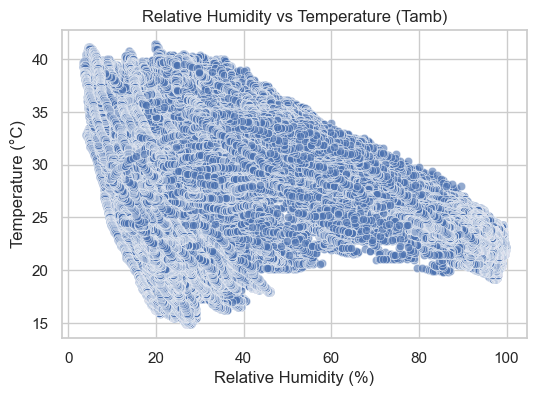

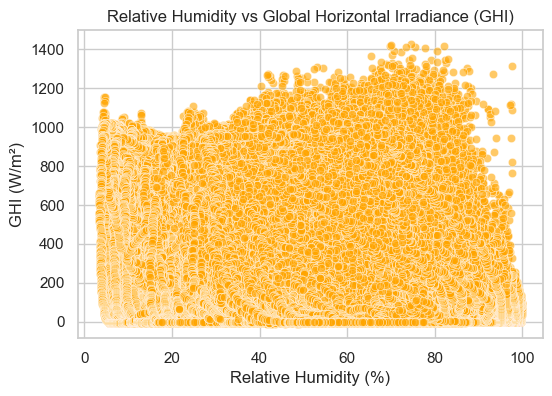

In [20]:

sns.set(style="whitegrid")

# RH vs Tamb
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='RH', y='Tamb', alpha=0.6)
plt.title('Relative Humidity vs Temperature (Tamb)')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Temperature (°C)')
plt.show()

# RH vs GHI
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='RH', y='GHI', alpha=0.6, color='orange')
plt.title('Relative Humidity vs Global Horizontal Irradiance (GHI)')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('GHI (W/m²)')
plt.show()


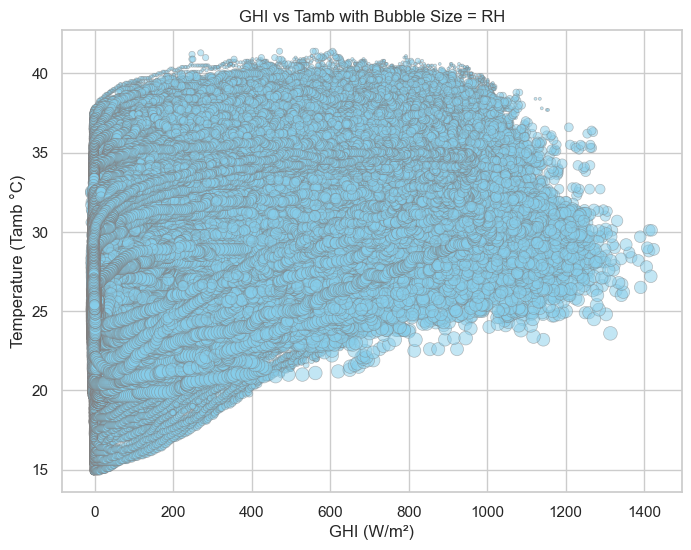

In [21]:
plt.figure(figsize=(8, 6))
plt.scatter(df['GHI'], df['Tamb'], s=df['RH'], alpha=0.5, c='skyblue', edgecolors='grey', linewidth=0.5)
plt.title('GHI vs Tamb with Bubble Size = RH')
plt.xlabel('GHI (W/m²)')
plt.ylabel('Temperature (Tamb °C)')
plt.grid(True)
plt.show()


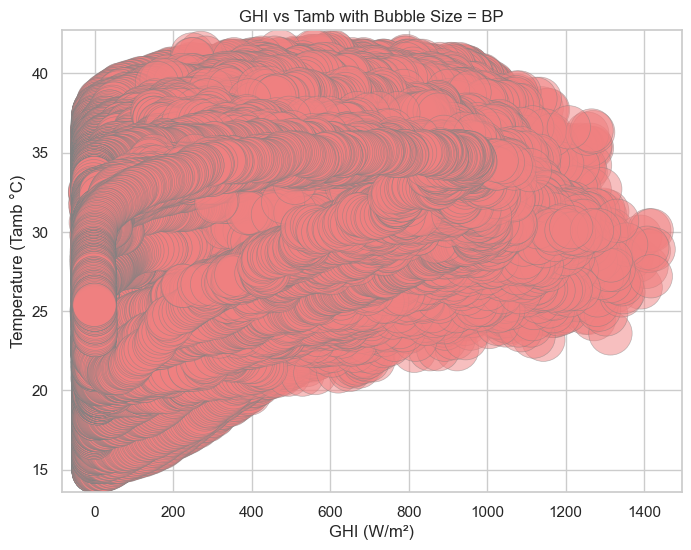

In [22]:
plt.figure(figsize=(8, 6))
plt.scatter(df['GHI'], df['Tamb'], s=df['BP'], alpha=0.5, c='lightcoral', edgecolors='grey', linewidth=0.5)
plt.title('GHI vs Tamb with Bubble Size = BP')
plt.xlabel('GHI (W/m²)')
plt.ylabel('Temperature (Tamb °C)')
plt.grid(True)
plt.show()
